In [163]:
import pandas as pd
gamestats = pd.read_csv('C:\\Users\\hkhoi\\Desktop\\Python Practice\Dataset\\17k-apple-app-store-strategy-games\\appstore_games.csv')

In [164]:
#gamestats.describe()
gamestatsf=gamestats

In [165]:
# Drop unused rows and columns
gamestatsf = gamestatsf.drop(columns="URL")
gamestatsf = gamestatsf.drop(columns="Icon URL")


In [166]:
gamestatsf.columns= ['ID', 'Name','Subtitle','User_Rating','User_Rating_Count','Price','In_App_Purchase','Desc','Dev','Age_Rating','Languages','Size','Primary_Genre','Genre','Release_Date','Current_Version_date']



In [167]:
#Drop games that has no rating
gamestatsf = gamestatsf[pd.notnull(gamestatsf['User_Rating'])]

#Drop games that has rating less than 1% of maximum user rating count
#Low_User_Count=gamestatsf[gamestatsf.User_Rating_Count < (gamestatsf['User_Rating_Count'].max())*0.0001].index
Low_User_Count=gamestatsf[gamestatsf.User_Rating_Count < 200].index
gamestatsf.drop(Low_User_Count , inplace=True)

In [168]:
gamestatsf['Size2'] = round(gamestatsf['Size']/1000000,1)



In [169]:
gamestatsf.User_Rating_Count.max()

3032734.0

In [170]:
gamestatsf.describe()

,ID,User_Rating,User_Rating_Count,Price,Size,Size2
count,2.241000e+03,2241.000000,2.241000e+03,2241.000000,2.241000e+03,2241.000000
mean,8.565390e+08,4.251896,1.106146e+04,0.713008,2.094721e+08,209.471397
std,3.641865e+08,0.544065,7.719963e+04,3.430738,3.470557e+08,347.055625
min,2.849214e+08,1.500000,2.000000e+02,0.000000,2.158400e+05,0.200000
25%,5.078745e+08,4.000000,4.200000e+02,0.000000,5.055693e+07,50.600000
50%,8.983830e+08,4.500000,1.108000e+03,0.000000,1.203405e+08,120.300000
75%,1.163805e+09,4.500000,4.180000e+03,0.000000,2.304778e+08,230.500000
max,1.471337e+09,5.000000,3.032734e+06,139.990000,4.005591e+09,4005.600000


In [171]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

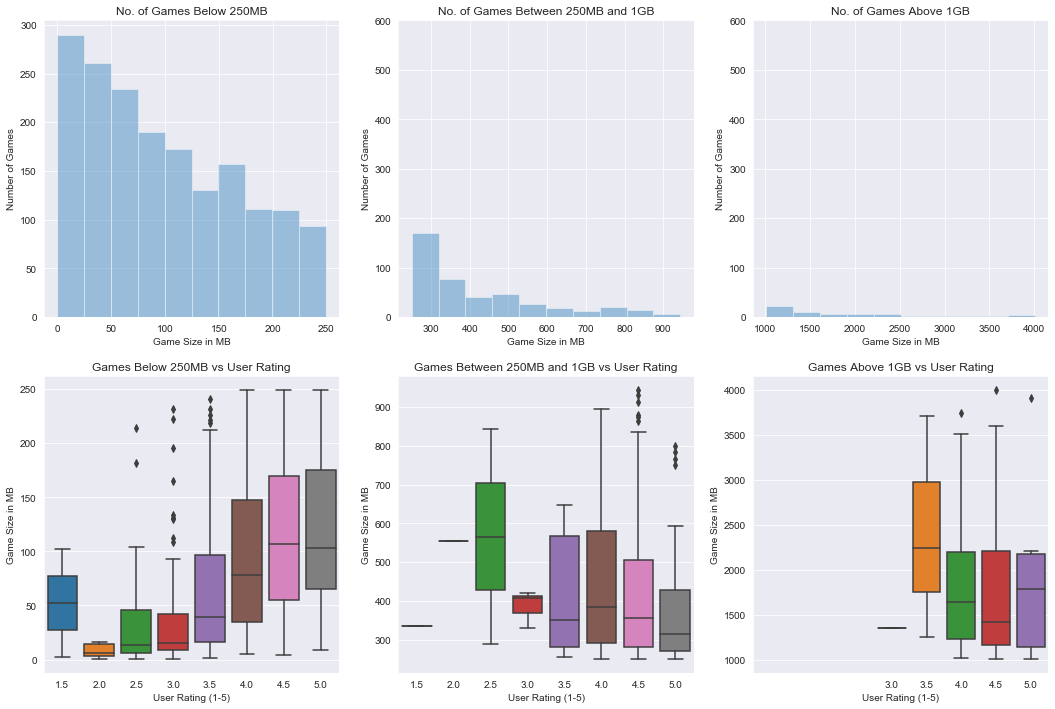

In [172]:
Size_Less_250MB = gamestatsf[gamestatsf.Size2 <250]
Size_More_250MB = gamestatsf[(gamestatsf.Size2 >=250) & (gamestatsf.Size2 <1000)]
Size_More_1GB = gamestatsf[gamestatsf.Size2 >=1000]


sns.set_style('darkgrid')
f, axes = plt.subplots (2,3, figsize=(18,12))



vis1 = sns.boxplot( data = Size_Less_250MB, x = 'User_Rating', y = 'Size2',  ax=axes[1,0])
vis2 = sns.boxplot( data = Size_More_250MB, x = 'User_Rating', y = 'Size2', ax=axes[1,1])
vis3 = sns.boxplot( data = Size_More_1GB, x = 'User_Rating', y = 'Size2', ax=axes[1,2],)
vis4 = sns.distplot(Size_Less_250MB.Size2, bins= 10, kde=False,ax=axes[0,0])
vis5 = sns.distplot(Size_More_250MB.Size2, bins= 10, kde=False,ax=axes[0,1])
vis6 = sns.distplot(Size_More_1GB.Size2, bins= 10, kde=False,ax=axes[0,2])

vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis2.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis3.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
vis4.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis5.set(xlabel='Game Size in MB',ylabel='Number of Games')
vis6.set(xlabel='Game Size in MB',ylabel='Number of Games')

axes[0, 0].set_title('No. of Games Below 250MB')
axes[0, 1].set_title('No. of Games Between 250MB and 1GB')
axes[0, 2].set_title('No. of Games Above 1GB')
axes[1, 0].set_title('Games Below 250MB vs User Rating')
axes[1, 1].set_title('Games Between 250MB and 1GB vs User Rating')
axes[1, 2].set_title('Games Above 1GB vs User Rating')
vis3.set(xlim=(-4, 4.5))

vis5.set(ylim=(0, 600))
vis6.set(ylim=(0, 600))

plt.ioff()

----- GENRES------

In [173]:
gamestatsfg = gamestatsf.copy()


In [174]:
gamestatsfg['Genre'] = gamestatsfg['Genre'].str.replace(',', '').str.replace('Games', '').str.replace('Entertainment', '').str.replace('Strategy', '') 
gamestatsfg['Genre'] = gamestatsfg['Genre'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
gamestatsfg['Genre']=gamestatsfg['Genre'].str.strip()

In [175]:
#gamestatsfg.Genre.unique()

In [176]:
Non_Main_Genre=gamestatsfg[~gamestatsfg.Genre.str.contains('Puzzle') & \
                           ~gamestatsfg.Genre.str.contains('Action') & \
                           ~gamestatsfg.Genre.str.contains('Family')& \
                           ~gamestatsfg.Genre.str.contains('Education')& \
                           ~gamestatsfg.Genre.str.contains('Family')& \
                           ~gamestatsfg.Genre.str.contains('Adventure')&\
                           ~gamestatsfg.Genre.str.contains('Board')&\
                           ~gamestatsfg.Genre.str.contains('Role')].index
gamestatsfg.drop(Non_Main_Genre , inplace=True)

In [177]:
#gamestatsfg.Genre.unique()

In [178]:
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Puzzle'),'Genre'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Board'),'Genre'] = 'Puzzle'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Action'),'Genre'] = 'Action'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Adventure'),'Genre'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Role'),'Genre'] = 'Adventure'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Family'),'Genre'] = 'Family'
gamestatsfg.loc[gamestatsfg['Genre'].str.contains('Education'),'Genre'] = 'Family'
    
    

In [179]:
gamestatsfg.Genre.unique()

array(['Puzzle', 'Action', 'Adventure', 'Family'], dtype=object)

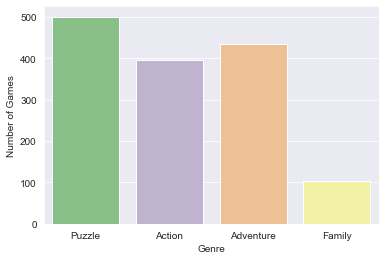

In [180]:
x=['Puzzle','Action','Adventure','Family']
y = [gamestatsfg.Genre[(gamestatsfg['Genre']=='Puzzle')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Action')].count(),\
     gamestatsfg.Genre[(gamestatsfg['Genre']=='Adventure')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Family')].count()]

vis1= sns.barplot(x,y,palette='Accent')
vis1.set(xlabel='Genre',ylabel='Number of Games')
plt.ioff()

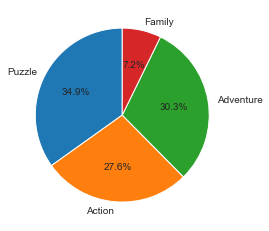

In [181]:
NG = [gamestatsfg.Genre[(gamestatsfg['Genre']=='Puzzle')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Action')].count(),\
     gamestatsfg.Genre[(gamestatsfg['Genre']=='Adventure')].count(),gamestatsfg.Genre[(gamestatsfg['Genre']=='Family')].count()]
G = ['Puzzle','Action','Adventure','Family']

plt.pie(NG, labels=G, startangle=90, autopct='%.1f%%')
plt.show()

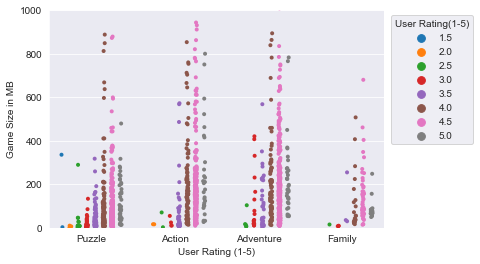

In [182]:
vis1= sns.stripplot(y='Size2' , x='Genre', data=gamestatsfg,\
                hue='User_Rating',dodge=True, size=4)

plt.legend(title='User Rating(1-5)',bbox_to_anchor=(1.28, 1))

vis1.set(ylim=(0, 1000))
vis1.set(xlabel='User Rating (1-5)',ylabel='Game Size in MB')
plt.ioff()

--- Date released/updated factor ---

In [183]:
gamestatsfg['Year'] = gamestatsfg['Release_Date']


In [184]:
for i in (list(gamestatsfg.index.values)):
    gamestatsfg['Year'][i]=gamestatsfg['Year'][i][-4:]

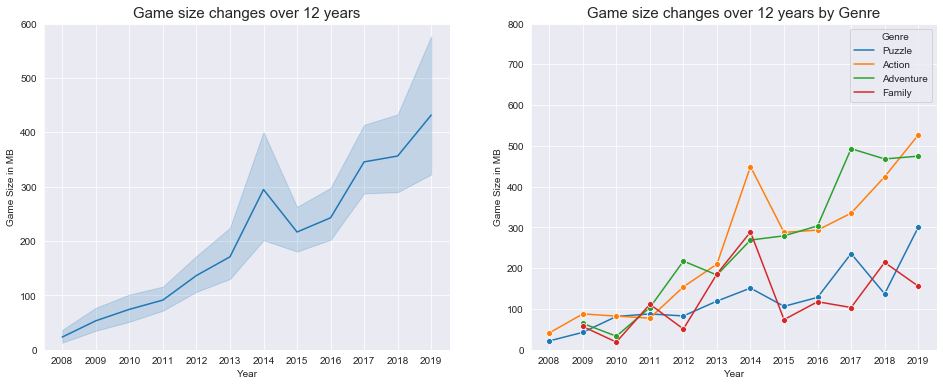

In [185]:
g, axes = plt.subplots (1,2, figsize=(16,6))

vis1 = sns.lineplot(x=gamestatsfg.Year, y=gamestatsfg.Size2, data=gamestatsfg, ax=axes[0])
vis1.set(ylim=(0, 600))
vis2 = sns.lineplot(x=gamestatsfg.Year, y=gamestatsfg.Size2, hue=gamestatsfg.Genre, err_style=None, marker='o',ax=axes[1])
vis2.set(ylim=(0, 800))
plt.legend(bbox_to_anchor=(1, 1))

axes[0].set_title('Game size changes over 12 years',fontsize=15)
axes[1].set_title('Game size changes over 12 years by Genre',fontsize=15)

vis1.set(xlabel='Year',ylabel='Game Size in MB')
vis2.set(xlabel='Year',ylabel='Game Size in MB')

plt.ioff()

In [186]:
gamestatsfg.Size2.describe()

count    1437.000000
mean      213.032429
std       351.743979
min         0.200000
25%        44.800000
50%       112.700000
75%       230.300000
max      3747.700000
Name: Size2, dtype: float64

---Price and update factor---

In [187]:
gamestatsf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2241 entries, 0 to 16874
Data columns (total 17 columns):
ID                      2241 non-null int64
Name                    2241 non-null object
Subtitle                1085 non-null object
User_Rating             2241 non-null float64
User_Rating_Count       2241 non-null float64
Price                   2241 non-null float64
In_App_Purchase         1703 non-null object
Desc                    2241 non-null object
Dev                     2241 non-null object
Age_Rating              2241 non-null object
Languages               2236 non-null object
Size                    2241 non-null float64
Primary_Genre           2241 non-null object
Genre                   2241 non-null object
Release_Date            2241 non-null object
Current_Version_date    2241 non-null object
Size2                   2241 non-null float64
dtypes: float64(5), int64(1), object(11)
memory usage: 315.1+ KB


Text(0.5, 1.0, 'User Rating vs Price')

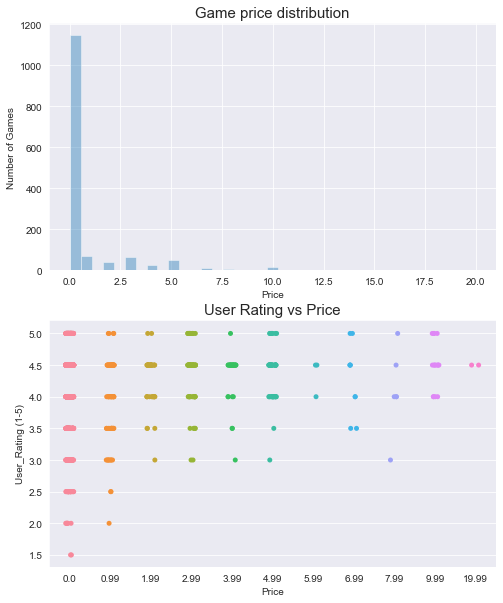

In [188]:
#Extreme_Price=gamestatsf[gamestatsf.Price > 20].index
#gamestatsf.drop(Extreme_Price , inplace=True)

h, axes = plt.subplots (2,1, figsize=(8,10))

vis1 = sns.distplot(gamestatsfg.Price,kde=None,ax=axes[0])
vis2 = sns.stripplot(x=gamestatsfg.Price, y=gamestatsfg.User_Rating, data=gamestatsfg,ax=axes[1],)

vis1.set(xlabel='Price',ylabel='Number of Games')
vis2.set(xlabel='Price',ylabel='User_Rating (1-5)')

axes[0].set_title('Game price distribution',fontsize=15)
axes[1].set_title('User Rating vs Price',fontsize=15)


---In App Purchase---

In [245]:
gamestatsfg2=gamestatsfg.copy()
import statistics

In [246]:
gamestatsfg2['In_App_Purchase'] = gamestatsfg2['In_App_Purchase'].str.replace(',', '') 
gamestatsfg2.In_App_Purchase=gamestatsfg2.In_App_Purchase.fillna(0)
#gamestatsfg2['Inn_App_Purchase'] = gamestatsfg2['Inn_App_Purchase'].str.split(' ').map(lambda x: ' '.join(sorted(x)))
#gamestatsfg2['Inn_App_Purchase']=gamestatsfg2['Inn_App_Purchase'].str.strip


In [247]:
for i in (list(gamestatsfg2.index.values)):
    if gamestatsfg2.In_App_Purchase[i] ==0:
        gamestatsfg2['In_App_Purchase'][i]=0.01
    elif gamestatsfg2.In_App_Purchase[i] !=0:
        A=str.split(gamestatsfg2.In_App_Purchase[i])
        A=[float(i) for i in A]
        gamestatsfg2['In_App_Purchase'][i]=statistics.mean(A)

In [269]:
#gamestatsfg2.In_App_Purchase.astype(np.float16)

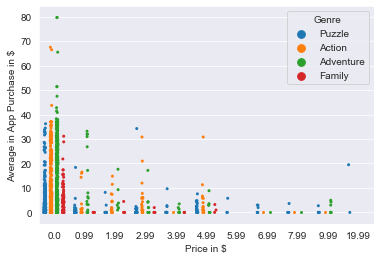

In [274]:
vis1= sns.stripplot(y=gamestatsfg2.In_App_Purchase , x=gamestatsfg2.Price, data=gamestatsfg2, hue=gamestatsfg2.Genre, dodge=True, size=3)

vis1.set(xlabel='Price in $',ylabel='Average in App Purchase in $')
plt.ioff()

In [259]:
type(gamestatsfg2.In_App_Purchase[2])

float

---Age Rating factor---

In [285]:
gamestatsfg.Age_Rating.unique()

array(['4+', '9+', '12+', '17+'], dtype=object)

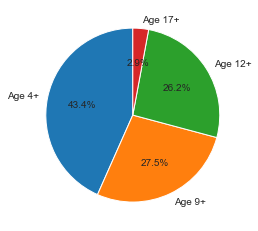

In [289]:
NAR = [gamestatsfg.Age_Rating[(gamestatsfg['Age_Rating']=='4+')].count(),gamestatsfg.Age_Rating[(gamestatsfg['Age_Rating']=='9+')].count(),\
     gamestatsfg.Age_Rating[(gamestatsfg['Age_Rating']=='12+')].count(),gamestatsfg.Age_Rating[(gamestatsfg['Age_Rating']=='17+')].count()]
AR = ['Age 4+','Age 9+','Age 12+','Age 17+']

plt.pie(NAR, labels=AR, startangle=90, autopct='%.1f%%')
plt.show()




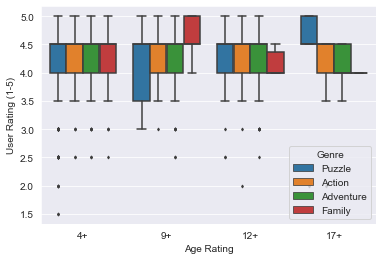

In [302]:
vis1 = sns.boxplot(x=gamestatsfg3.Age_Rating, y=gamestatsfg.User_Rating, data=gamestatsfg, hue=gamestatsfg.Genre, dodge=True, fliersize=2)

vis1.set(xlabel='Age Rating',ylabel='User Rating (1-5)')

plt.ioff()